In [3]:
%pip install --upgrade DBcm

Note: you may need to restart the kernel to use updated packages.


In [4]:
import DBcm

In [5]:
credentials = {
    "host": "localhost",
    "database": "BlackjackDB",
    "user": "richard",
    "password": "richpassword"
}

In [7]:
with DBcm.UseDatabase(credentials) as db:    # database context manager: "db" is a database connection.
    SQL = "select * from user_game_statistics"
    db.execute(SQL)  # sends the SQL command to the server to run.
    results = db.fetchall()  # gets any results from the server.
# automatically closed the database connection.

In [6]:
import random

In [28]:
for _ in range(10):
    SQL = """
        insert into user_game_statistics
        (user, outcomes)
        values
        (%s, %s)
    """
    
    gamer = "JosherFella"
    outcome = random.choice(["Win", "Loss"])
    with DBcm.UseDatabase(credentials) as db:
        db.execute(SQL,(gamer,outcome))
        SQL = """select * from user_game_statistics"""
        db.execute(SQL)
        results = db.fetchall()
        

In [22]:

SQL = """
    delete from user_game_statistics
    where user = "Reacu"
"""
with DBcm.UseDatabase(credentials) as db:
    db.execute(SQL)
    SQL = """select * from user_game_statistics"""
    db.execute(SQL)
    results = db.fetchall()
        

In [31]:
results

[('Reacu', 'Loss'),
 ('Reacu', 'Win'),
 ('Reacu', 'Loss'),
 ('Reacu', 'Win'),
 ('Reacu', 'Win'),
 ('Reacu', 'Win'),
 ('Reacu', 'Win'),
 ('Reacu', 'Win'),
 ('Reacu', 'Win'),
 ('Reacu', 'Loss'),
 ('JosherFella', 'Loss'),
 ('JosherFella', 'Loss'),
 ('JosherFella', 'Loss'),
 ('JosherFella', 'Loss'),
 ('JosherFella', 'Win'),
 ('JosherFella', 'Loss'),
 ('JosherFella', 'Win'),
 ('JosherFella', 'Loss'),
 ('JosherFella', 'Loss'),
 ('JosherFella', 'Win'),
 ('Rooblan', 'Loss'),
 ('Rooblan', 'Loss'),
 ('Rooblan', 'Loss'),
 ('Rooblan', 'Win'),
 ('Rooblan', 'Loss'),
 ('Rooblan', 'Loss'),
 ('Rooblan', 'Loss'),
 ('Rooblan', 'Win'),
 ('Rooblan', 'Win'),
 ('Rooblan', 'Win')]

In [7]:
with DBcm.UseDatabase(credentials) as db:
    SQL = """
        select user from user_game_statistics
    """
    db.execute(SQL)
    tags = db.fetchall()

In [55]:
tags

[('Reacu',),
 ('Reacu',),
 ('Reacu',),
 ('Reacu',),
 ('Reacu',),
 ('Reacu',),
 ('Reacu',),
 ('Reacu',),
 ('Reacu',),
 ('Reacu',),
 ('JosherFella',),
 ('JosherFella',),
 ('JosherFella',),
 ('JosherFella',),
 ('JosherFella',),
 ('JosherFella',),
 ('JosherFella',),
 ('JosherFella',),
 ('JosherFella',),
 ('JosherFella',),
 ('Rooblan',),
 ('Rooblan',),
 ('Rooblan',),
 ('Rooblan',),
 ('Rooblan',),
 ('Rooblan',),
 ('Rooblan',),
 ('Rooblan',),
 ('Rooblan',),
 ('Rooblan',)]

In [51]:
tags = [ row[0] for row in tags ]
print(tags)

['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R']


In [35]:
who = random.choice(tags)
who

'Reacu'

In [ ]:
def random_user():
    with DBcm.UseDatabase(credentials) as db:
        SQL = """
            select user from user_game_statistics
        """
        db.execute(SQL)
        tags = db.fetchall()
        tags = [ row[0] for row in tags ]
        who = random.choice(tags)
    return who

In [ ]:
gamer = random_user()
outcome = random.choice(["Win", "Loss"])
gamer, outcome

In [ ]:
for _ in range(500):
    SQL = """
        insert into user_game_statistics
        ( user, outcomes )
        values     
        (%s, %s)
    """
    user = random_user()
    outcome = random.choice(["Win", "Loss"])
    with DBcm.UseDatabase(credentials) as db:
        db.execute(SQL, (gamer, outcome, ))   # tuple.
        SQL = """select * from games"""
        db.execute(SQL)
        results = db.fetchall()
        ## print(results[-3:])

In [ ]:
len(results)

In [8]:
with DBcm.UseDatabase(credentials) as db:
    SQL = """select distinct user from user_game_statistics"""
    db.execute(SQL)
    tags = db.fetchall()
    print(len(tags))
    

3


In [12]:
tags

[('Reacu',), ('JosherFella',), ('Rooblan',)]

In [69]:
##Insert win rate if none
for tag in tags:
    with DBcm.UseDatabase(credentials) as db:    
        SQL = """
            select count(*) from user_game_statistics 
            where user = %s and outcomes = "Win"
        """
        db.execute(SQL, (tag ))   # single value, not a tuple.
        results = db.fetchone()  
        wins = results[0]
        SQL = """
            select count(*) from user_game_statistics 
            where user = %s and outcomes = "Loss"
        """
        db.execute(SQL, (tag ))   # single value, not a tuple.
        results = db.fetchone() 
        losses = results[0]

        SQL = """
    	    insert into user_statistics
            (user, win_rate)
            values
            (%s , %s)
    """
        winRatio = wins / (wins+losses)
        db.execute(SQL,(tag[0],winRatio,))

    ## print("Wins:", wins)
    ## print("Losses:", losses)
    
    print(tag, winRatio)
    print("-"*60)
        


('Reacu',) 0.7
------------------------------------------------------------
('JosherFella',) 0.3
------------------------------------------------------------
('Rooblan',) 0.4
------------------------------------------------------------


In [29]:
##update win rate
for tag in tags:
    with DBcm.UseDatabase(credentials) as db:
        SQL = """ 
            select count(*) from user_game_statistics
            where user = %s and outcomes = "Win"
        """
        db.execute(SQL,(tag))
        results = db.fetchone()
        wins = results[0]

        SQL = """
            select count(*) from user_game_statistics
            where user = %s and outcomes = "Loss"
        """
        db.execute(SQL,(tag))
        results = db.fetchone()
        losses = results[0]

        winRatio = wins / (wins + losses)

        SQL = """
            update user_statistics
            set win_rate = %s
            where user = %s
        """
        db.execute(SQL,(winRatio,tag[0]))

        print(tag, winRatio)
        print("-" * 60)

('Reacu',) 0.6
------------------------------------------------------------
('JosherFella',) 0.35
------------------------------------------------------------
('Rooblan',) 0.4
------------------------------------------------------------


In [21]:
tag

('Rooblan',)

In [44]:
scores = {}

for tag in tags:
    with DBcm.UseDatabase(credentials) as db:    
        SQL = """
            select win_rate from user_statistics 
            where user = %s
        """
        db.execute(SQL, (tag))   # tuple.
        win_rate = db.fetchone()  

    scores[tag[0]] = win_rate[0]

In [39]:
%pip install --upgrade matplotlib


     ---------------------------------------- 0.0/159.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/159.4 kB ? eta -:--:--
     ------- ----------------------------- 30.7/159.4 kB 435.7 kB/s eta 0:00:01
     ------- ----------------------------- 30.7/159.4 kB 435.7 kB/s eta 0:00:01
     --------- --------------------------- 41.0/159.4 kB 245.8 kB/s eta 0:00:01
     ------------------- ----------------- 81.9/159.4 kB 383.3 kB/s eta 0:00:01
     --------------------- --------------- 92.2/159.4 kB 438.1 kB/s eta 0:00:01
     ------------------------- ---------- 112.6/159.4 kB 385.0 kB/s eta 0:00:01
     --------------------------- -------- 122.9/159.4 kB 361.0 kB/s eta 0:00:01
     -------------------------------- --- 143.4/159.4 kB 370.8 kB/s eta 0:00:01
     ------------------------------------ 159.4/159.4 kB 367.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.2 kB ? 

In [45]:
scores

{'Reacu': 0.6, 'JosherFella': 0.35, 'Rooblan': 0.4}

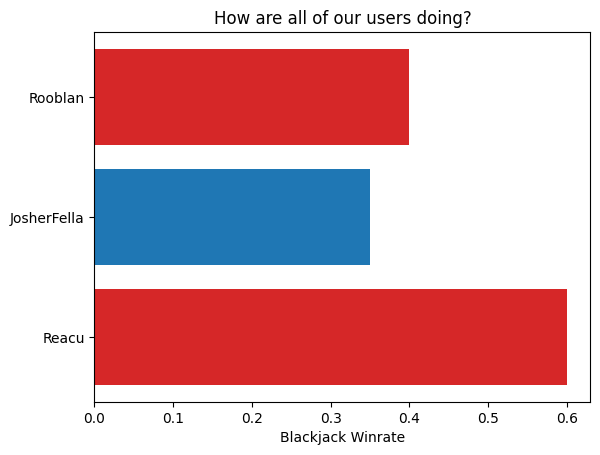

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

y_labels = list(scores.keys())
x_values = list(scores.values())


bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.barh(y_labels, x_values, color=bar_colors)


ax.set_xlabel('Blackjack Winrate')
ax.set_title('How are all of our users doing?')

plt.show()